In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

def get_index_slugs(index_name):
    """
    Pobiera listę 'slugów' (nazw w URL) dla spółek z danego indeksu na Biznesradar.
    index_name: 'WIG20', 'mWIG40', 'sWIG80'
    """
    url = f"https://www.biznesradar.pl/gielda/indeks/{index_name}"
    print(f"🔍 Pobieram skład indeksu: {index_name}...")
    
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'html.parser')
    
    slugs = []
    
    # Szukamy tabeli z notowaniami
    table = soup.select_one('table.qTableFull')
    if not table:
        print("❌ Nie znaleziono tabeli!")
        return []

    rows = table.select('tr')
    for row in rows:
        link_elem = row.select_one('a.s_tt') # Klasa linku do spółki
        if link_elem:
            href = link_elem['href']
            # href wygląda tak: /notowania/CD-PROJEKT
            # my potrzebujemy tylko: CD-PROJEKT
            slug = href.split('/')[-1]
            slugs.append(slug)
            
    print(f"✅ Znaleziono {len(slugs)} spółek w {index_name}")
    return slugs

In [6]:
url = 'https://www.biznesradar.pl/notowania/WIG20TR#1d_lin_lin'

In [9]:
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
!pip install requests bs4 -q

In [12]:
!pip install seaborn -q

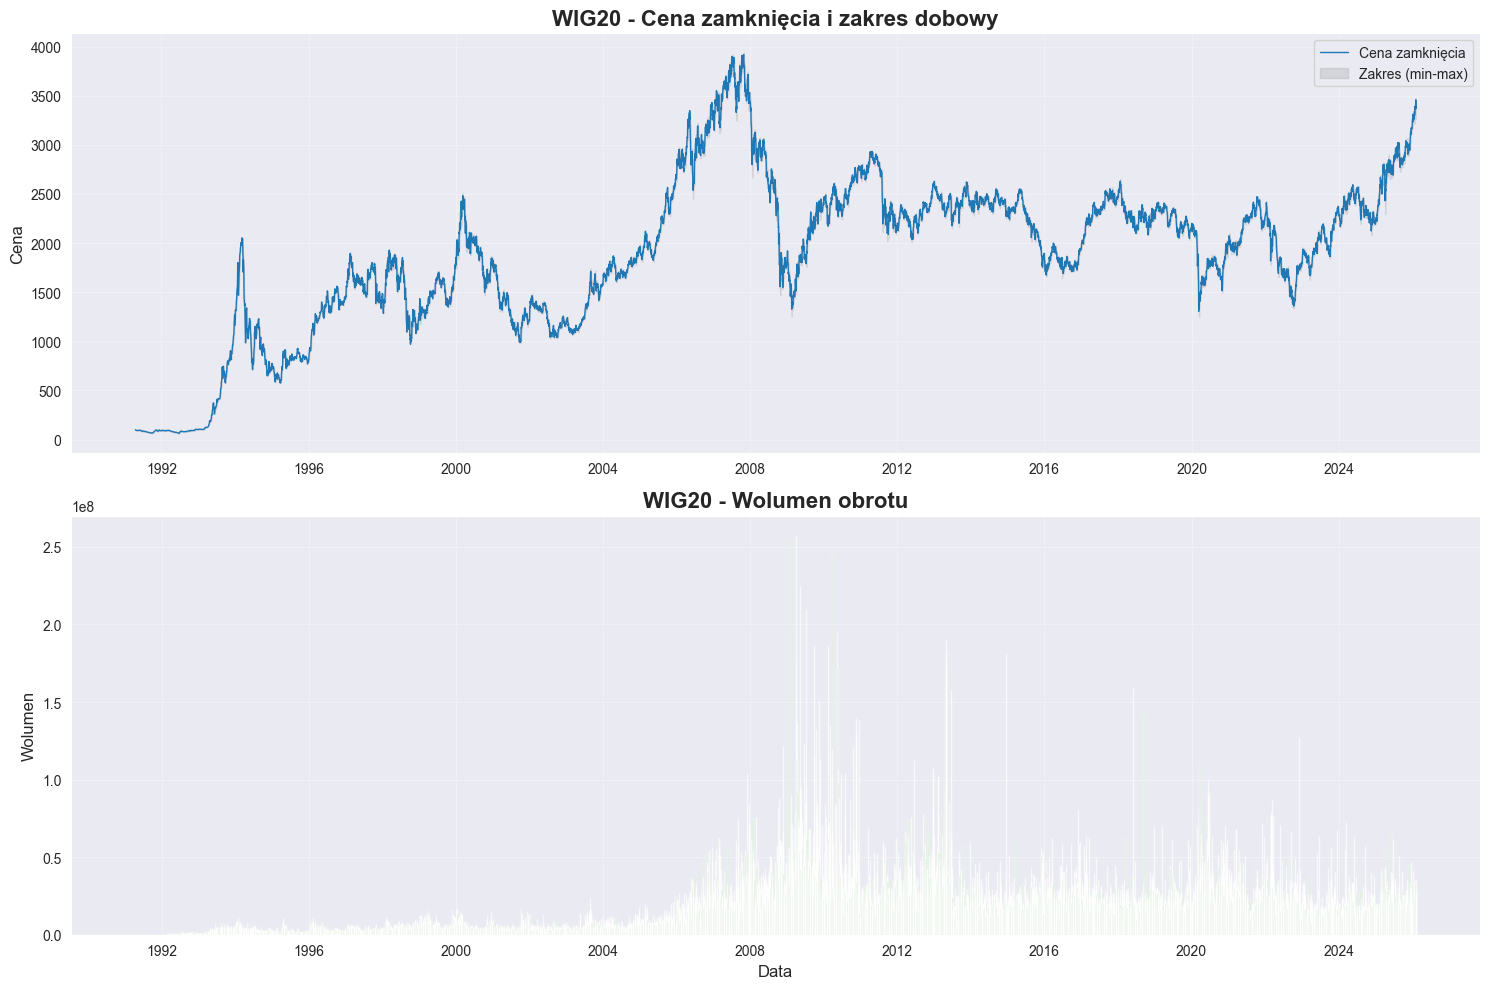

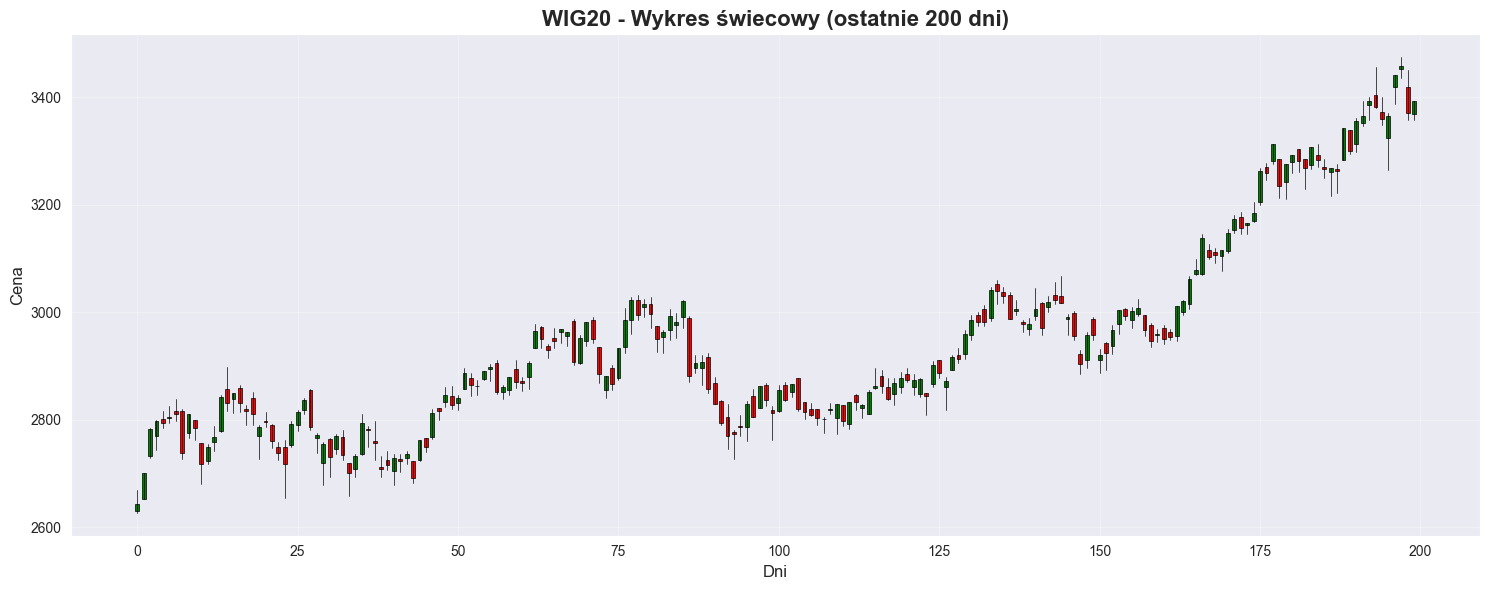


=== Statystyki WIG20 ===
Okres danych: od 1991-04-16 do 2026-02-06
Liczba dni: 8255

Cena zamknięcia:
  Minimum: 62.80
  Maximum: 3917.87
  Średnia: 1971.55
  Mediana: 2033.49

Wolumen:
  Średni: 18344393
  Maksymalny: 257333286


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
df = pd.read_csv('data/wig20_d.csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df.set_index('Data')

# Styl wykresów
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15, 10)

# Tworzenie subplotów
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Wykres 1: Cena zamknięcia
axes[0].plot(df.index, df['Zamkniecie'], linewidth=1, color='#1f77b4', label='Cena zamknięcia')
axes[0].fill_between(df.index, df['Najnizszy'], df['Najwyzszy'], alpha=0.2, color='gray', label='Zakres (min-max)')
axes[0].set_title('WIG20 - Cena zamknięcia i zakres dobowy', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Cena', fontsize=12)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Wykres 2: Wolumen
axes[1].bar(df.index, df['Wolumen'], width=1, color='#2ca02c', alpha=0.7)
axes[1].set_title('WIG20 - Wolumen obrotu', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Wolumen', fontsize=12)
axes[1].set_xlabel('Data', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('wig20_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Dodatkowa wizualizacja: Świeczki (candlestick) - ostatnie 200 dni
fig2, ax = plt.subplots(figsize=(15, 6))

recent_data = df.tail(200)

# Kolory dla świeczek
colors = ['green' if close >= open_ else 'red' 
          for close, open_ in zip(recent_data['Zamkniecie'], recent_data['Otwarcie'])]

# Rysowanie świeczek
for i, (idx, row) in enumerate(recent_data.iterrows()):
    # Linia (min-max)
    ax.plot([i, i], [row['Najnizszy'], row['Najwyzszy']], color='black', linewidth=0.5)
    
    # Prostokąt (otwarcie-zamknięcie)
    height = abs(row['Zamkniecie'] - row['Otwarcie'])
    bottom = min(row['Otwarcie'], row['Zamkniecie'])
    ax.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, 
                                facecolor=colors[i], edgecolor='black', linewidth=0.5))

ax.set_title('WIG20 - Wykres świecowy (ostatnie 200 dni)', fontsize=16, fontweight='bold')
ax.set_ylabel('Cena', fontsize=12)
ax.set_xlabel('Dni', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('wig20_candlestick.png', dpi=300, bbox_inches='tight')
plt.show()

# Statystyki
print("\n=== Statystyki WIG20 ===")
print(f"Okres danych: od {df.index.min().date()} do {df.index.max().date()}")
print(f"Liczba dni: {len(df)}")
print(f"\nCena zamknięcia:")
print(f"  Minimum: {df['Zamkniecie'].min():.2f}")
print(f"  Maximum: {df['Zamkniecie'].max():.2f}")
print(f"  Średnia: {df['Zamkniecie'].mean():.2f}")
print(f"  Mediana: {df['Zamkniecie'].median():.2f}")
print(f"\nWolumen:")
print(f"  Średni: {df['Wolumen'].mean():.0f}")
print(f"  Maksymalny: {df['Wolumen'].max():.0f}")
